In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

from metpy.cbook import get_test_data
from metpy.calc import resample_nn_1d
from metpy.io import get_upper_air_data
from metpy.plots import SkewT
from metpy.units import units

%matplotlib inline

# Change default to be better for skew-T
plt.rcParams['figure.figsize'] = (9, 9)

In [2]:
from metpy.io.upperair import UseSampleData
with UseSampleData():  # Only needed to use our local sample data
    # Download and parse the data
    dataset = get_upper_air_data(datetime(2013, 1, 20, 12), 'OUN')

p = dataset.variables['pressure'][:]
T = dataset.variables['temperature'][:]
Td = dataset.variables['dewpoint'][:]
u = dataset.variables['u_wind'][:]
v = dataset.variables['v_wind'][:]

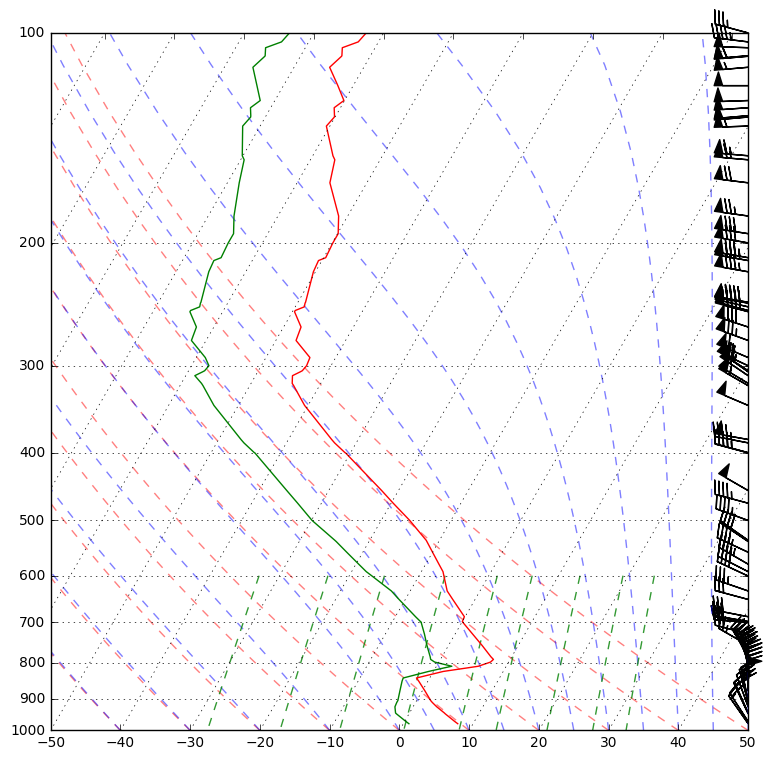

In [3]:
# Create a skewT using matplotlib's default figure size
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

# Show the plot
plt.show()

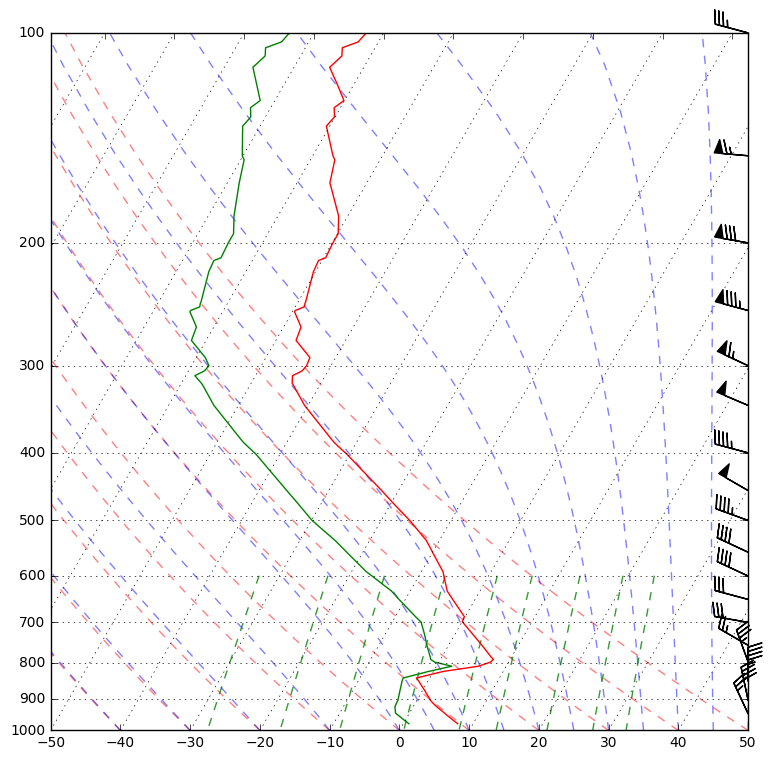

In [4]:
# Example of defining your own vertical barb spacing
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

#Set spacing interval
#Example: Every 50 mb from 1000 to 100 mb
my_interval = np.arange(100, 1000, 50) * units('mbar')

#Get indexes of values closest to defined interval
ix = resample_nn_1d(p, my_interval)

#Plot only values nearest to defined interval values
skew.plot_barbs(p[ix], u[ix], v[ix])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

# Show the plot
plt.show()